In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from venn import venn
from collections import Counter
import numpy as np
from sklearn.preprocessing import Imputer
import scipy.stats as sts
mpl.rcParams['figure.dpi'] =300

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


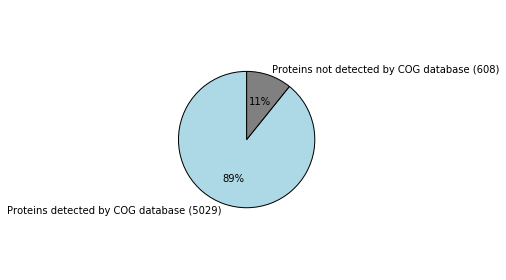

In [2]:
data_COGs = pd.read_table('cog-class_total.txt')
data_raw = pd.read_table('blast2go_go_table.txt')
data_COGs_raw = pd.read_table('cog-raw_total.txt', header=None)

labels = ['Proteins detected by COG database'+ ' ' + '(' + str(len(data_COGs_raw[0])) + ')', 'Proteins not detected by COG database' + ' ' + '(' + str(len(data_raw['SeqName'])-len(data_COGs_raw[0]))+')']
sizes = [89.21, 100-89.21]
colors = ['lightblue', 'gray']
patches, plt_labels, texts = plt.pie(sizes,autopct='%0.0f%%', colors=colors, shadow= False, startangle=90, labels=labels)
for w in patches:
    w.set_linewidth(1)
    w.set_edgecolor('k')

plt.axis('equal')
plt.tight_layout()
plt.show()

In [3]:
# Getting dictionary: ID to class
dictionary_class_IDtoclass = pd.read_table('cog-class_total.txt')

dict_IDtoclass = {}
for i, value in enumerate(dictionary_class_IDtoclass['#Class']):
    dict_IDtoclass[value]=dictionary_class_IDtoclass['Description'][i]

# Getting dictionary: COG to ID

dictionary_class_cogtoID = pd.read_table('listcogs.txt', header=None)
dict_cogtoID = {}
for i, value in enumerate(set(dictionary_class_cogtoID[3])):
    dummy = dictionary_class_cogtoID[dictionary_class_cogtoID[3]==value]
    for i2, value2 in enumerate(dummy[5]):
        dict_cogtoID[value2] = list(dummy[3])[i2]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 0, 'Number of proteins')

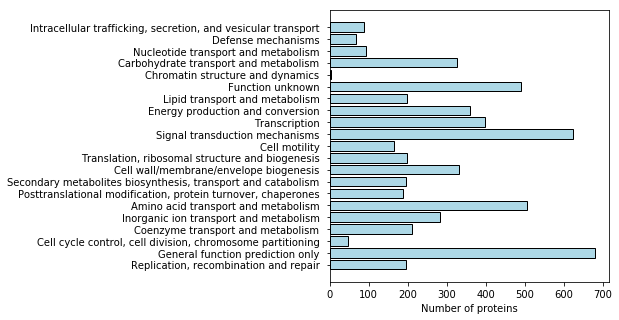

In [4]:
#Whole proteome proteins distribution
annotation_whole = [dict_cogtoID[i] for i in data_COGs_raw[12]]
cnt = Counter()
for words in annotation_whole:
      for letters in set(words):
          cnt[letters]+=1

height = list(cnt.values())
index = list(cnt.keys())

fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.barh(width =  height,y = [dict_IDtoclass[i] for i in index], color= 'lightblue',
       edgecolor = 'k')
ax.set_xlabel('Number of proteins')

In [5]:
#16 pop out #Will break here: run bottom first
hi = pd.DataFrame(0,index = data_frame2.index, columns = ['count'])
#remove b
#index.remove('B')
#Remove at index 
#del height[16]
# Add in dataframe
hi.loc[[ dict_IDtoclass[i] for i in index], 'count'] = height
hi

NameError: name 'data_frame2' is not defined

In [ ]:
labels = list(hi.index)
sizes = [i/sum(hi['count']) *100 for i in list(hi['count'])]
true_label = []
for i in sizes:
    true_label.append('%.1f' % i + '%')
color= ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#ffffff', '#000000', 'lavender', 'darkslateblue', 'goldenrod']
patches, texts = plt.pie(sizes, shadow= False,colors= color, startangle=90, labels=true_label)
for w in patches:
    w.set_linewidth(1)
    w.set_edgecolor('k')


plt.axis('equal')
plt.legend(labels = labels)
plt.savefig("SP7_COGterms.svg", dpi=300)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Number of proteins')

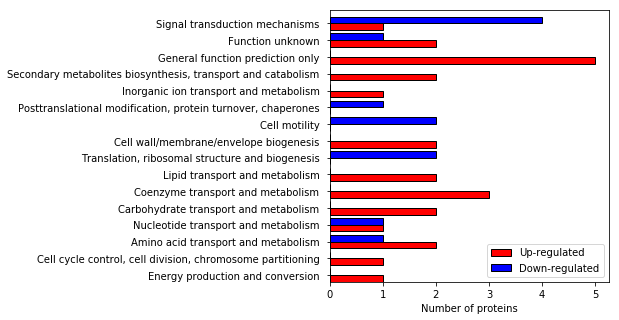

In [7]:
#CheA1 vs sp7 distribution COGs
up = pd.read_table('cog-raw_A1up.txt', header = None)
down = pd.read_table('cog-raw_A1down.txt', header= None)

up_annotation = [dict_cogtoID[i] for i in up[12]]
cnt_up = Counter()
for words in up_annotation:
    for letters in set(words):
        cnt_up[letters]+=1
        
height_up = list(cnt_up.values())
index_up = list(cnt_up.keys())


down_annotation = [dict_cogtoID[i] for i in down[12]]
cnt_down = Counter()
for words in down_annotation:
    for letters in set(words):
        cnt_down[letters]+=1
        
height_down = list(cnt_down.values())
index_down = list(cnt_down.keys())

data_frame = pd.DataFrame(0 , index= np.arange(len(data_COGs['#Class'])),
                         columns = ['label', 'up', 'down'])
data_frame['label'] = data_COGs['#Class']
data_frame = data_frame.set_index('label', drop=True).sort_index().rename_axis(None)

data_frame.loc[index_up, 'up'] = height_up
data_frame.loc[index_down, 'down'] = height_down
data_frame = data_frame.loc[~(data_frame==0).all(axis=1)]

ind = np.arange(len(data_frame))
width = 0.4

fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.barh(ind, data_frame['up'], width, color='red', label='Up-regulated', edgecolor='k')
ax.barh(ind + width, data_frame['down'], width, color='blue', edgecolor = 'k',label='Down-regulated')

ax.set(yticks=ind + width/2, yticklabels=[dict_IDtoclass[i] for i in data_frame.index], ylim=[2*width - 1, len(data_frame)])
ax.legend()
ax.set_xlabel('Number of proteins')

Text(0.5, 0, 'Log$_{10}$ (P-value)')

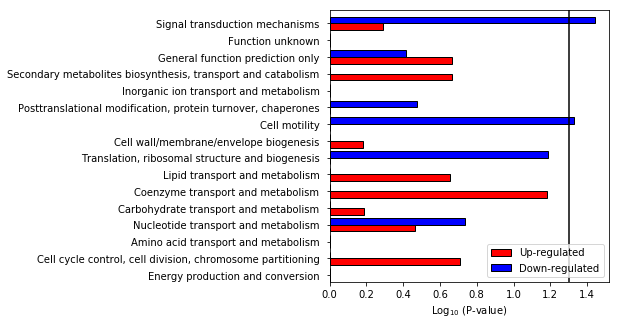

In [8]:
#CheA1 vs sp7 enrichment analysis COGs

whole_proteome = pd.DataFrame(0, index = np.arange(len(height)), columns = ['index', 'height'])
#up_withoutanno = 
#whole_withoutanno =
whole_proteome['index'] = index
whole_proteome['height'] = height
whole_proteome = whole_proteome.set_index('index', drop=True).rename_axis(None)

up_inanno = list(data_frame['up'])
down_inanno = list(data_frame['down'])
whole_inanno = list(whole_proteome['height'])
# whole and up different length
up_notinanno = [sum(up_inanno) - i for i in up_inanno]
down_notinanno = [sum(down_inanno) - i for i in down_inanno]
whole_notinanno = [sum(whole_inanno)- i for i in whole_inanno]


up_proteome = pd.DataFrame(0, index = np.arange(len(data_frame)), columns = ['index', 'height'])
up_proteome['index'] = list(data_frame.index)
up_proteome['height'] = list(data_frame['up'])
up_proteome = up_proteome.set_index('index', drop=True).rename_axis(None)

down_proteome = pd.DataFrame(0, index = np.arange(len(data_frame)), columns = ['index', 'height'])
down_proteome['index'] = list(data_frame.index)
down_proteome['height'] = list(data_frame['down'])
down_proteome = down_proteome.set_index('index', drop=True).rename_axis(None)


whole_proteome['not in'] =whole_notinanno
up_proteome['not in']= up_notinanno
down_proteome['not in'] = down_notinanno

test_whole = whole_proteome.loc[up_proteome.index]
test_index = list(test_whole.index)


oddsratio_up = []
p_val_up = []

#For up-regulated p-values and odd ratios
for i, value in enumerate(test_index):
    table = np.array([[up_proteome.loc[value]['height'],test_whole.loc[value]['height']],
                     [up_proteome.loc[value]['not in'],test_whole.loc[value]['not in']]])
    oddsratio, pvalue = sts.fisher_exact(table)
    if pvalue == 1:
        p_val_up.append(0.999)
    else:
        p_val_up.append(pvalue)
    oddsratio_up.append(oddsratio)

oddsratio_down = []
p_val_down = []    
    
#For down-regulated p-values and odd ratios
for i, value in enumerate(test_index):
    table = np.array([[down_proteome.loc[value]['height'],test_whole.loc[value]['height']],
                     [down_proteome.loc[value]['not in'],test_whole.loc[value]['not in']]])
    oddsratio, pvalue = sts.fisher_exact(table)
    if pvalue == 1:
        p_val_down.append(0.999)
    else:
        p_val_down.append(pvalue)
    oddsratio_down.append(oddsratio)
    
ind = np.arange(len(oddsratio_down))
width = 0.4

fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.barh(ind, [-np.log10(i) for i in p_val_up], width, color='red', label='Up-regulated', edgecolor='k')
ax.barh(ind + width, [-np.log10(i) for i in p_val_down], width, color='blue', edgecolor = 'k',label='Down-regulated')

ax.set(yticks=ind + width/2, yticklabels=[dict_IDtoclass[i] for i in test_index], ylim=[2*width - 1, len(oddsratio_down)])
ax.legend(loc = 'lower right')
ax.axvline(x = -np.log10(0.05), color = 'k')
ax.set_xlabel('Log$_{10}$ (P-value)')


Text(0.5, 0, 'Fold-enrichment (OR)')

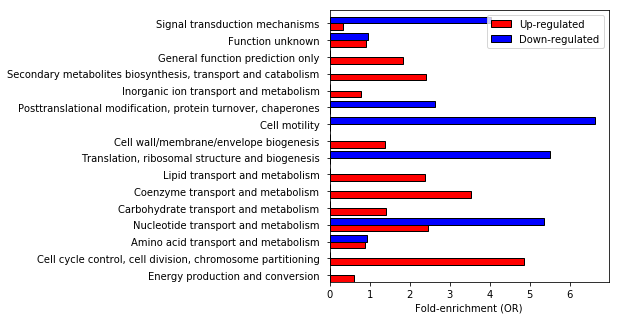

In [9]:
#CheA1 vs sp7 enrichment analysis oddratio
ind = np.arange(len(oddsratio_down))
width = 0.4

fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.barh(ind, oddsratio_up, width, color='red', label='Up-regulated', edgecolor='k')
ax.barh(ind + width, oddsratio_down, width, color='blue', edgecolor = 'k',label='Down-regulated')

ax.set(yticks=ind + width/2, yticklabels=[dict_IDtoclass[i] for i in test_index], ylim=[2*width - 1, len(oddsratio_down)])
ax.legend()
#ax.axvline(x = -np.log10(0.05), color = 'k')
ax.set_xlabel('Fold-enrichment (OR)')


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


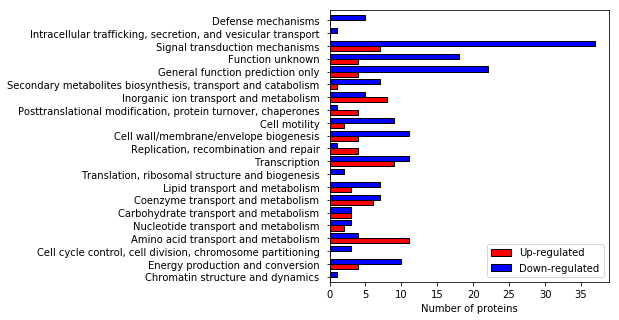

In [10]:
#CheA4 vs sp7 distribution COGs
up = pd.read_table('cog-raw_A4up.txt', header = None)
down = pd.read_table('cog-raw_A4down.txt', header= None)

up_annotation = [dict_cogtoID[i] for i in up[12]]
cnt_up = Counter()
for words in up_annotation:
    for letters in set(words):
        cnt_up[letters]+=1
        
height_up = list(cnt_up.values())
index_up = list(cnt_up.keys())


down_annotation = [dict_cogtoID[i] for i in down[12]]
cnt_down = Counter()
for words in down_annotation:
    for letters in set(words):
        cnt_down[letters]+=1
        
height_down = list(cnt_down.values())
index_down = list(cnt_down.keys())

data_frame = pd.DataFrame(0 , index= np.arange(len(data_COGs['#Class'])),
                         columns = ['label', 'up', 'down'])
data_frame['label'] = data_COGs['#Class']
data_frame = data_frame.set_index('label', drop=True).sort_index().rename_axis(None)

data_frame.loc[index_up, 'up'] = height_up
data_frame.loc[index_down, 'down'] = height_down
data_frame = data_frame.loc[~(data_frame==0).all(axis=1)]

ind = np.arange(len(data_frame))
width = 0.4

fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.barh(ind, data_frame['up'], width, color='red', label='Up-regulated', edgecolor='k')
ax.barh(ind + width, data_frame['down'], width, color='blue', edgecolor = 'k',label='Down-regulated')

ax.set(yticks=ind + width/2, yticklabels=[dict_IDtoclass[i] for i in data_frame.index], ylim=[2*width - 1, len(data_frame)])
ax.legend()
ax.set_xlabel('Number of proteins')

plt.show()

Text(0.5, 0, 'Log$_{10}$ (P-value)')

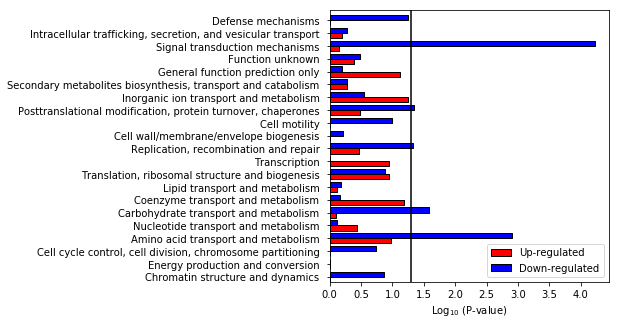

In [11]:
#CheA4 vs sp7 enrichment analysis COGs

up_inanno = list(data_frame['up'])
down_inanno = list(data_frame['down'])
whole_inanno = list(whole_proteome['height'])
# whole and up different length
up_notinanno = [sum(up_inanno) - i for i in up_inanno]
down_notinanno = [sum(down_inanno) - i for i in down_inanno]
whole_notinanno = [sum(whole_inanno)- i for i in whole_inanno]

whole_proteome = pd.DataFrame(0, index = np.arange(len(height)), columns = ['index', 'height'])
#up_withoutanno = 
#whole_withoutanno =
whole_proteome['index'] = index
whole_proteome['height'] = height
whole_proteome = whole_proteome.set_index('index', drop=True).rename_axis(None)

up_proteome = pd.DataFrame(0, index = np.arange(len(data_frame)), columns = ['index', 'height'])
up_proteome['index'] = list(data_frame.index)
up_proteome['height'] = list(data_frame['up'])
up_proteome = up_proteome.set_index('index', drop=True).rename_axis(None)

down_proteome = pd.DataFrame(0, index = np.arange(len(data_frame)), columns = ['index', 'height'])
down_proteome['index'] = list(data_frame.index)
down_proteome['height'] = list(data_frame['down'])
down_proteome = down_proteome.set_index('index', drop=True).rename_axis(None)


whole_proteome['not in'] =whole_notinanno
up_proteome['not in']= up_notinanno
down_proteome['not in'] = down_notinanno

test_whole = whole_proteome.loc[up_proteome.index]
test_index = list(test_whole.index)


oddsratio_up = []
p_val_up = []

#For up-regulated p-values and odd ratios
for i, value in enumerate(test_index):
    table = np.array([[up_proteome.loc[value]['height'],test_whole.loc[value]['height']],
                     [up_proteome.loc[value]['not in'],test_whole.loc[value]['not in']]])
    oddsratio, pvalue = sts.fisher_exact(table)
    if pvalue == 1:
        p_val_up.append(0.999)
    else:
        p_val_up.append(pvalue)
    oddsratio_up.append(oddsratio)

oddsratio_down = []
p_val_down = []    
    
#For down-regulated p-values and odd ratios
for i, value in enumerate(test_index):
    table = np.array([[down_proteome.loc[value]['height'],test_whole.loc[value]['height']],
                     [down_proteome.loc[value]['not in'],test_whole.loc[value]['not in']]])
    oddsratio, pvalue = sts.fisher_exact(table)
    if pvalue == 1:
        p_val_down.append(0.999)
    else:
        p_val_down.append(pvalue)
    oddsratio_down.append(oddsratio)
    
ind = np.arange(len(oddsratio_down))
width = 0.4

fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.barh(ind, [-np.log10(i) for i in p_val_up], width, color='red', label='Up-regulated', edgecolor='k')
ax.barh(ind + width, [-np.log10(i) for i in p_val_down], width, color='blue', edgecolor = 'k',label='Down-regulated')

ax.set(yticks=ind + width/2, yticklabels=[dict_IDtoclass[i] for i in test_index], ylim=[2*width - 1, len(oddsratio_down)])
ax.legend(loc = 'lower right')
ax.axvline(x = -np.log10(0.05), color = 'k')
ax.set_xlabel('Log$_{10}$ (P-value)')


Text(0.5, 0, 'Fold-enrichment (OR)')

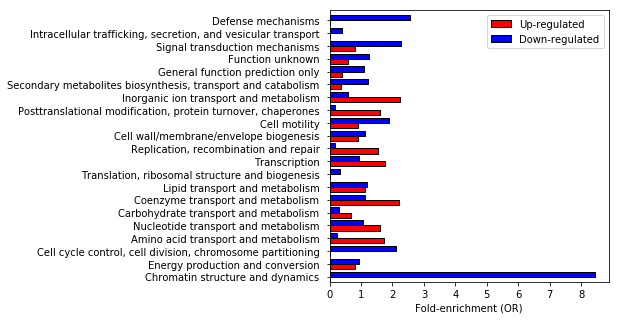

In [12]:
#CheA4 vs sp7 enrichment analysis oddratio
ind = np.arange(len(oddsratio_down))
width = 0.4

fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.barh(ind, oddsratio_up, width, color='red', label='Up-regulated', edgecolor='k')
ax.barh(ind + width, oddsratio_down, width, color='blue', edgecolor = 'k',label='Down-regulated')

ax.set(yticks=ind + width/2, yticklabels=[dict_IDtoclass[i] for i in test_index], ylim=[2*width - 1, len(oddsratio_down)])
ax.legend()
#ax.axvline(x = -np.log10(0.05), color = 'k')
ax.set_xlabel('Fold-enrichment (OR)')


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


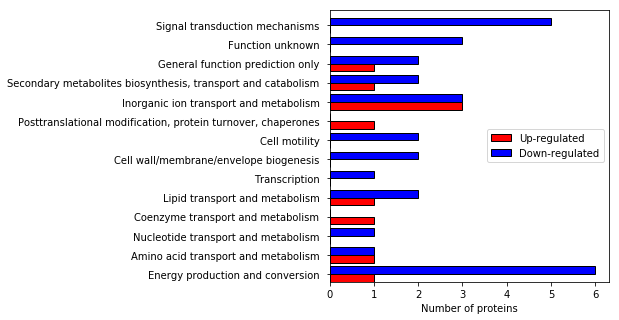

In [13]:
#CheA1CheA4 vs sp7 distribution COGs
up = pd.read_table('cog-raw_A1A4up.txt', header = None)
down = pd.read_table('cog-raw_A1A4 down.txt', header= None)

up_annotation = [dict_cogtoID[i] for i in up[12]]
cnt_up = Counter()
for words in up_annotation:
    for letters in set(words):
        cnt_up[letters]+=1
        
height_up = list(cnt_up.values())
index_up = list(cnt_up.keys())


down_annotation = [dict_cogtoID[i] for i in down[12]]
cnt_down = Counter()
for words in down_annotation:
    for letters in set(words):
        cnt_down[letters]+=1
        
height_down = list(cnt_down.values())
index_down = list(cnt_down.keys())

data_frame = pd.DataFrame(0 , index= np.arange(len(data_COGs['#Class'])),
                         columns = ['label', 'up', 'down'])
data_frame['label'] = data_COGs['#Class']
data_frame = data_frame.set_index('label', drop=True).sort_index().rename_axis(None)

data_frame.loc[index_up, 'up'] = height_up
data_frame.loc[index_down, 'down'] = height_down
data_frame = data_frame.loc[~(data_frame==0).all(axis=1)]

ind = np.arange(len(data_frame))
width = 0.4

fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.barh(ind, data_frame['up'], width, color='red', label='Up-regulated', edgecolor='k')
ax.barh(ind + width, data_frame['down'], width, color='blue', edgecolor = 'k',label='Down-regulated')

ax.set(yticks=ind + width/2, yticklabels=[dict_IDtoclass[i] for i in data_frame.index], ylim=[2*width - 1, len(data_frame)])
ax.legend()
ax.set_xlabel('Number of proteins')

plt.show()

Text(0.5, 0, 'Log$_{10}$ (P-value)')

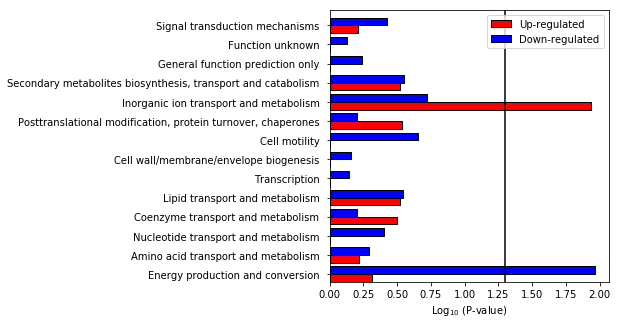

In [14]:
#CheA1CheA4 vs sp7 enrichment analysis COGs

up_inanno = list(data_frame['up'])
down_inanno = list(data_frame['down'])
whole_inanno = list(whole_proteome['height'])
# whole and up different length
up_notinanno = [sum(up_inanno) - i for i in up_inanno]
down_notinanno = [sum(down_inanno) - i for i in down_inanno]
whole_notinanno = [sum(whole_inanno)- i for i in whole_inanno]

whole_proteome = pd.DataFrame(0, index = np.arange(len(height)), columns = ['index', 'height'])
#up_withoutanno = 
#whole_withoutanno =
whole_proteome['index'] = index
whole_proteome['height'] = height
whole_proteome = whole_proteome.set_index('index', drop=True).rename_axis(None)

up_proteome = pd.DataFrame(0, index = np.arange(len(data_frame)), columns = ['index', 'height'])
up_proteome['index'] = list(data_frame.index)
up_proteome['height'] = list(data_frame['up'])
up_proteome = up_proteome.set_index('index', drop=True).rename_axis(None)

down_proteome = pd.DataFrame(0, index = np.arange(len(data_frame)), columns = ['index', 'height'])
down_proteome['index'] = list(data_frame.index)
down_proteome['height'] = list(data_frame['down'])
down_proteome = down_proteome.set_index('index', drop=True).rename_axis(None)


whole_proteome['not in'] =whole_notinanno
up_proteome['not in']= up_notinanno
down_proteome['not in'] = down_notinanno

test_whole = whole_proteome.loc[up_proteome.index]
test_index = list(test_whole.index)


oddsratio_up = []
p_val_up = []

#For up-regulated p-values and odd ratios
for i, value in enumerate(test_index):
    table = np.array([[up_proteome.loc[value]['height'],test_whole.loc[value]['height']],
                     [up_proteome.loc[value]['not in'],test_whole.loc[value]['not in']]])
    oddsratio, pvalue = sts.fisher_exact(table)
    if pvalue == 1:
        p_val_up.append(0.999)
    else:
        p_val_up.append(pvalue)
    oddsratio_up.append(oddsratio)

oddsratio_down = []
p_val_down = []    
    
#For down-regulated p-values and odd ratios
for i, value in enumerate(test_index):
    table = np.array([[down_proteome.loc[value]['height'],test_whole.loc[value]['height']],
                     [down_proteome.loc[value]['not in'],test_whole.loc[value]['not in']]])
    oddsratio, pvalue = sts.fisher_exact(table)
    if pvalue == 1:
        p_val_down.append(0.999)
    else:
        p_val_down.append(pvalue)
    oddsratio_down.append(oddsratio)
    
ind = np.arange(len(oddsratio_down))
width = 0.4

fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.barh(ind, [-np.log10(i) for i in p_val_up], width, color='red', label='Up-regulated', edgecolor='k')
ax.barh(ind + width, [-np.log10(i) for i in p_val_down], width, color='blue', edgecolor = 'k',label='Down-regulated')

ax.set(yticks=ind + width/2, yticklabels=[dict_IDtoclass[i] for i in test_index], ylim=[2*width - 1, len(oddsratio_down)])
ax.legend()
ax.axvline(x = -np.log10(0.05), color = 'k')
ax.set_xlabel('Log$_{10}$ (P-value)')


Text(0.5, 0, 'Fold-enrichment (OR)')

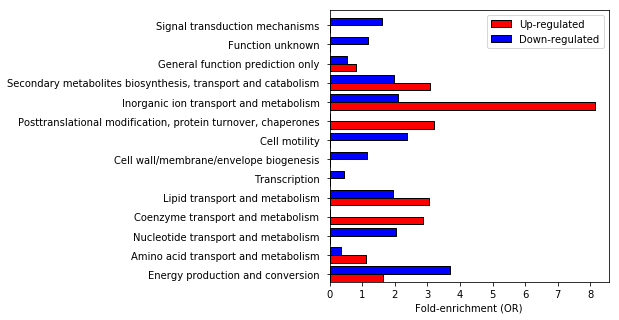

In [15]:
#CheA1CheA4 vs sp7 enrichment analysis oddratio
ind = np.arange(len(oddsratio_down))
width = 0.4

fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.barh(ind, oddsratio_up, width, color='red', label='Up-regulated', edgecolor='k')
ax.barh(ind + width, oddsratio_down, width, color='blue', edgecolor = 'k',label='Down-regulated')

ax.set(yticks=ind + width/2, yticklabels=[dict_IDtoclass[i] for i in test_index], ylim=[2*width - 1, len(oddsratio_down)])
ax.legend()
#ax.axvline(x = -np.log10(0.05), color = 'k')
ax.set_xlabel('Fold-enrichment (OR)')


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


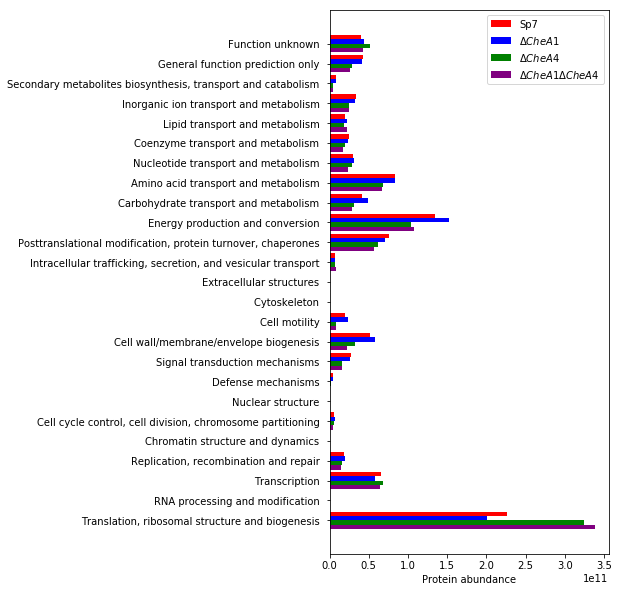

In [16]:
#Whole protein abundance for all sp7, a1,a4, a1a4 protein abundance for all COGs
A1_raw_MS = pd.read_excel('proteomics_cheA1_sp7_rawmsdata.xlsx')
A4_raw_MS = pd.read_excel('A4_A1A4_sp7_rawMSdata.xlsx')

overlapping_protein =list(set(A4_raw_MS['ProteinID']).intersection(set(A1_raw_MS['ProteinID'])))

dummy = A4_raw_MS.set_index('ProteinID')
dummy.loc[overlapping_protein, 'CheA1_Rep01'] = A1_raw_MS.set_index('ProteinID').loc[overlapping_protein]['CheA1_Rep01']
dummy.loc[overlapping_protein, 'CheA1_Rep02'] = A1_raw_MS.set_index('ProteinID').loc[overlapping_protein]['CheA1_Rep02']
dummy.loc[overlapping_protein, 'CheA1_Rep03'] = A1_raw_MS.set_index('ProteinID').loc[overlapping_protein]['CheA1_Rep03']

#Perform mean imputation based on columns axis
value_columns = dummy.columns[2::]
# Create an imputer object that looks for 'Nan' values, then replaces them with the mean value of the feature by columns (axis=0)
mean_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)

# Train the imputor on the df dataset
mean_imputer = mean_imputer.fit(dummy[value_columns])
imputed_df = mean_imputer.transform(dummy[value_columns].values)
dummy[value_columns] = imputed_df

#for i in dummy['UniProtID']:
 #   print(i)

cog_file_abundance = pd.read_table('cog-raw_proteinall.txt', header=None)
index = cog_file_abundance[0]
cog_ID = cog_file_abundance[12]

#Dummy to only avalable protein
dummy = dummy.loc[index]

#Set index ID for mean calculation
A1 = value_columns[9:12]
A4 = value_columns[0:3]
sp7 = value_columns[6:9]
A1A4 = value_columns[3:6]

mean_A1 = [ 2**i for i in list(dummy[A1].mean(axis=1))]
mean_A4 = [ 2**i for i in list(dummy[A4].mean(axis=1))]
mean_A1A4 = [ 2**i for i in list(dummy[A1A4].mean(axis=1))]
mean_sp7 = [ 2**i for i in list(dummy[sp7].mean(axis=1))]

data_frame = pd.DataFrame(0, index = index, columns = ['sp7','A1','A4','A1A4'])
data_frame['sp7']= mean_sp7
data_frame['A1']= mean_A1
data_frame['A4']= mean_A4
data_frame['A1A4']= mean_A1A4
data_frame['COG_Class']= [dict_cogtoID[i] for i in list(cog_ID)]


sp7_total = []
A1_total =[]
A4_total =[]
A1A4_total =[]
index_class = list(dict_IDtoclass.keys())
for i, value in enumerate(list(dict_IDtoclass.keys())):
    dummy2 = data_frame[data_frame['COG_Class'].isin([value])]
    sum_dataframe = dummy2.sum(axis=0)
    sp7_total.append(sum_dataframe['sp7']) 
    A1_total.append(sum_dataframe['A1']) 
    A4_total.append(sum_dataframe['A4']) 
    A1A4_total.append(sum_dataframe['A1A4']) 

data_frame2 = pd.DataFrame(0, index = list(dict_IDtoclass.values()), columns = ['sp7','A1','A4','A1A4'])
data_frame2.loc[list(dict_IDtoclass.values()), 'sp7'] = sp7_total
data_frame2.loc[list(dict_IDtoclass.values()), 'A1'] = A1_total
data_frame2.loc[list(dict_IDtoclass.values()), 'A4'] = A4_total
data_frame2.loc[list(dict_IDtoclass.values()), 'A1A4'] = A1A4_total
    
    
    
ind = np.arange(len(data_frame2))
barWidth = 0.22
   
fig, ax = plt.subplots(1,1, figsize=(5,10))

r1 = np.arange(len(data_frame2))
r2 = [x - barWidth for x in r1]
r3 = [x - barWidth for x in r2]
r4 = [x - barWidth for x in r3]

ax.barh(r1, data_frame2['sp7'], barWidth, color='red', label='Sp7')
ax.barh(r2, data_frame2['A1'], barWidth, color='blue',label='\u0394$CheA1$')
ax.barh(r3, data_frame2['A4'], barWidth, color='green', label='\u0394$CheA4$')
ax.barh(r4, data_frame2['A1A4'], barWidth, color='purple',label='\u0394$CheA1$\u0394$CheA4$')


ax.set(yticks=r1 - 1.5*barWidth, yticklabels=list(data_frame2.index))
ax.legend()
ax.set_xlabel('Protein abundance')
plt.show()
    
    

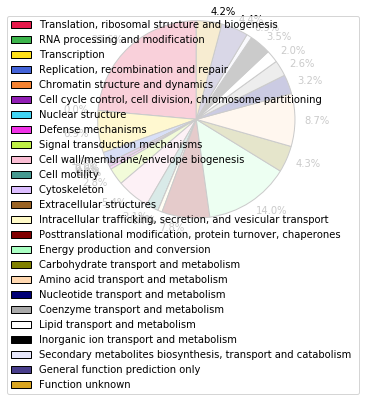

In [17]:
#percentage protein abundance 
#SP7
#data_frame2 =  data_frame2[(data_frame2.T != 0).any()]
labels = list(data_frame2.index)
sizes = [i/sum(data_frame2['sp7']) *100 for i in list(data_frame2['sp7'])]
true_label = []
for i in sizes:
    true_label.append('%.1f' % i + '%')
color= ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#ffffff', '#000000', 'lavender', 'darkslateblue', 'goldenrod']
patches, texts = plt.pie(sizes, shadow= False,colors= color, startangle=90, labels=true_label)
for w in patches:
    w.set_linewidth(1)
    w.set_edgecolor('k')


plt.axis('equal')
plt.legend(labels = labels)
plt.savefig("SP7_distribution.svg", dpi=300)
plt.show()

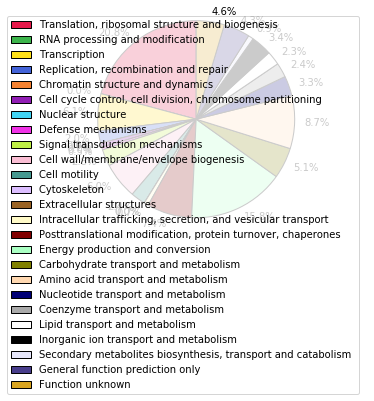

In [18]:
#percentage protein abundance 
#A1
#data_frame2 =  data_frame2[(data_frame2.T != 0).any()]
labels = list(data_frame2.index)
sizes = [i/sum(data_frame2['A1']) *100 for i in list(data_frame2['A1'])]
true_label = []
for i in sizes:
    true_label.append('%.1f' % i + '%')
color= ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#ffffff', '#000000', 'lavender', 'darkslateblue', 'goldenrod']
patches, texts = plt.pie(sizes, shadow= False,colors= color, startangle=90, labels=true_label)
for w in patches:
    w.set_linewidth(1)
    w.set_edgecolor('k')


plt.axis('equal')
plt.legend(labels = labels)
plt.savefig("A1_distribution.svg", dpi=300)
plt.show()


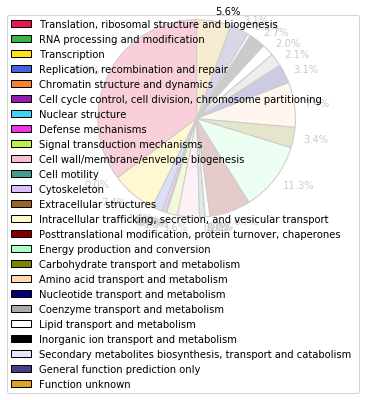

In [28]:
#percentage protein abundance 
#A4
#data_frame2 =  data_frame2[(data_frame2.T != 0).any()]
labels = list(data_frame2.index)
sizes = [i/sum(data_frame2['A4']) *100 for i in list(data_frame2['A4'])]
true_label = []
for i in sizes:
    true_label.append('%.1f' % i + '%')
color= ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#ffffff', '#000000', 'lavender', 'darkslateblue', 'goldenrod']
patches, texts = plt.pie(sizes, shadow= False,colors= color, startangle=90, labels=true_label)
for w in patches:
    w.set_linewidth(1)
    w.set_edgecolor('k')


plt.axis('equal')
plt.legend(labels = labels)
plt.savefig("A4_distribution.svg", dpi=300)
plt.show()

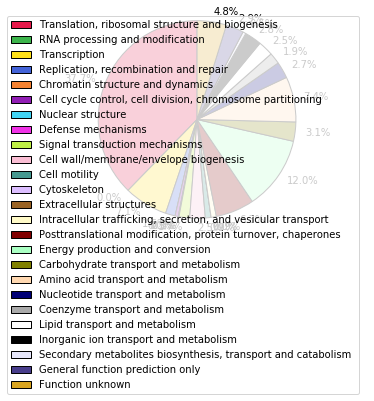

In [29]:
#percentage protein abundance 
#A1A4
#data_frame2 =  data_frame2[(data_frame2.T != 0).any()]
labels = list(data_frame2.index)
sizes = [i/sum(data_frame2['A1A4']) *100 for i in list(data_frame2['A1A4'])]
true_label = []
for i in sizes:
    true_label.append('%.1f' % i + '%')
color= ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#ffffff', '#000000', 'lavender', 'darkslateblue', 'goldenrod']
patches, texts = plt.pie(sizes, shadow= False,colors= color, startangle=90, labels=true_label)
for w in patches:
    w.set_linewidth(1)
    w.set_edgecolor('k')


plt.axis('equal')
plt.legend(labels = labels)
plt.savefig("A1A4_distribution.svg", dpi=300)
plt.show()


In [23]:
#Annotating heatmap
import re
heatmap = pd.read_excel('heatmapforpattern.xlsx')
COG_annotation_raw = pd.read_table('cog-raw_heatmap.txt', header=None)
COG_annotation_raw['Accession'] = [re.split('\|', i)[1] for i in COG_annotation_raw[0]]
#COG_annotation_raw = COG_annotation_raw.set_index('Accession', drop=True)

dummy = COG_annotation_raw[['Accession',12]]
cog_ID = []
index = list(set(dummy['Accession']))
for i,value in enumerate(index):
    cog_ID.append(list(dummy[dummy['Accession'] == index[i]][12]))
hi = pd.DataFrame(0, index = index, columns = ['COG_ID'])
hi['COG_ID'] = cog_ID


#converting
class_ID = []
for i, value in enumerate(hi['COG_ID']):
    if len(value) == 1:
        class_ID.append(dict_cogtoID[value[0]])
    elif len(value) > 1:
        dummy2 = []
        for i2 in value:
            dummy2.append(dict_cogtoID[i2])
        sep = ''
        class_ID.append(sep.join(dummy2))
hi2 = hi
hi2['COG_ID'] = class_ID

heatmap_has = heatmap[heatmap['Unnamed: 0'].isin(hi2.index)].drop_duplicates('Unnamed: 0').set_index('Unnamed: 0', drop=True)
heatmap_nohas = heatmap[~heatmap['Unnamed: 0'].isin(hi2.index)].drop_duplicates('Unnamed: 0').set_index('Unnamed: 0', drop=True)

heatmap_has.loc[hi.index,'COG_ID'] = class_ID
heatmap_has

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.


,description,CheA1/sp7 bio_rep 1,CheA1/sp7 bio_rep 2,CheA1/sp7 bio_rep 3,CheA4/sp7 bio_rep 1,CheA4/sp7 bio_rep 2,CheA4/sp7 bio_rep 3,CheA1CheA4/sp7 bio_rep 1,CheA1CheA4/sp7 bio_rep 2,CheA1CheA4/sp7 bio_rep 3,Annotation,COG_ID
Unnamed: 0,,,,,,,,,,,,
A0A0P0F7V4,Endolytic peptidoglycan transglycosylase RIpA,1.777566e+00,-2.782595e-01,-3.733088e+00,-1.769945,-1.003841,-1.221117,-0.375599,-0.012192,0.326202,Cell wall,MD
A0A0P0EHW0,Lytle murein transglycosylase,1.515989e+00,1.654452e+00,1.640531e+00,-0.407041,-1.111958,-0.310901,-1.472041,-1.782558,0.380099,Cell wall,M
A0A0N7I8Z4,Beta-lactarnase,1.422987e+00,-1.010654e+00,-3.917837e-02,-2.655821,-2.758938,-2.998831,0.825733,0.505397,1.284157,Cell wall,V
A0A0P0EIH1,Cell envelope biogenesis protein OmpA,-9.683417e-02,-3.884319e-01,-8.141491e-01,-1.335159,-1.379493,-1.252141,0.288610,0.381612,-0.058949,Cell wall,M
A0A0P0ERG4,Cell division protein FtsW,0.000000e+00,0.000000e+00,0.000000e+00,-5.297354,-5.172495,-2.972691,-0.580527,-0.734422,-0.703678,Cell wall,D
A0A0P0E9P8,DNA helicase,0.000000e+00,0.000000e+00,0.000000e+00,4.371350,4.945035,5.272885,3.113553,-0.307025,4.614734,DNA/RNA,LL
A0A0P0ELL3,Restriction endonuclease subunit M,-4.646110e+00,1.537541e+00,-3.689244e+00,-2.194398,-1.706062,-2.915917,0.535000,0.633358,0.647322,DNA/RNA,V
A0A0P0ED99,RNA helicase,-1.150275e+00,-7.994316e-11,4.331212e+00,2.085991,2.505922,1.384572,0.532496,1.011776,-0.728550,DNA/RNA,KL
A0A0P0EDN0,Transcription elongation factor GreB,-2.302752e+00,-2.045130e+00,-1.371139e+00,1.107817,1.230317,0.788115,-0.357546,-0.972181,-0.126099,DNA/RNA,K


In [19]:
data_frame2

,sp7,A1,A4,A1A4
"Translation, ribosomal structure and biogenesis",2.266259e+11,2.008730e+11,3.238614e+11,3.386730e+11
RNA processing and modification,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Transcription,6.606230e+10,5.841495e+10,6.761521e+10,6.408186e+10
"Replication, recombination and repair",1.804349e+10,1.962345e+10,1.570206e+10,1.424220e+10
Chromatin structure and dynamics,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
"Cell cycle control, cell division, chromosome partitioning",5.855603e+09,6.564064e+09,5.772768e+09,4.766588e+09
Nuclear structure,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Defense mechanisms,4.452586e+09,4.345490e+09,1.568911e+09,9.675280e+08
Signal transduction mechanisms,2.691380e+10,2.661610e+10,1.643420e+10,1.560397e+10
Cell wall/membrane/envelope biogenesis,5.181922e+10,5.748890e+10,3.292617e+10,2.266921e+10


In [7]:
dict_cogtoID

{'COG0008': 'J',
 'COG0009': 'J',
 'COG0012': 'J',
 'COG0013': 'J',
 'COG0016': 'J',
 'COG0017': 'J',
 'COG0018': 'J',
 'COG0023': 'J',
 'COG0024': 'J',
 'COG0030': 'J',
 'COG0042': 'J',
 'COG0048': 'J',
 'COG0049': 'J',
 'COG0050': 'J',
 'COG0051': 'J',
 'COG0052': 'J',
 'COG0060': 'J',
 'COG0064': 'J',
 'COG0072': 'J',
 'COG0080': 'J',
 'COG0081': 'J',
 'COG0087': 'J',
 'COG0088': 'J',
 'COG0089': 'J',
 'COG0090': 'J',
 'COG0091': 'J',
 'COG0092': 'J',
 'COG0093': 'J',
 'COG0094': 'J',
 'COG0096': 'J',
 'COG0097': 'J',
 'COG0098': 'J',
 'COG0099': 'J',
 'COG0100': 'J',
 'COG0101': 'J',
 'COG0102': 'J',
 'COG0103': 'J',
 'COG0124': 'J',
 'COG0130': 'J',
 'COG0143': 'J',
 'COG0144': 'J',
 'COG0154': 'J',
 'COG0162': 'J',
 'COG0172': 'J',
 'COG0173': 'J',
 'COG0180': 'J',
 'COG0182': 'J',
 'COG0184': 'J',
 'COG0185': 'J',
 'COG0186': 'J',
 'COG0193': 'J',
 'COG0197': 'J',
 'COG0198': 'J',
 'COG0199': 'J',
 'COG0200': 'J',
 'COG0203': 'J',
 'COG0211': 'J',
 'COG0215': 'J',
 'COG0216': 'J

In [20]:
dummy

,Unnamed: 0,UniProtID,cheA4_Rep02,cheA4_Rep03,cheA4_Rep01,cheAlchA4_Rep03,cheAlchA4_Rep02,cheAlchA4_Rep01,sp7_rep1,sp7_rep2,sp7_rep3,CheA1_Rep01,CheA1_Rep02,CheA1_Rep03
ProteinID,,,,,,,,,,,,,,
tr|A0A0P0EG03|A0A0P0EG03_AZOBR,70.0,A0A0P0EG03,24.1661,24.4155,24.0161,22.6029,23.7482,23.2227,25.427204,26.744337,24.399123,24.808748,24.356992,23.142550
tr|A0A0P0EG03|A0A0P0EG03_AZOBR,70.0,A0A0P0EG03,24.1661,24.4155,24.0161,22.6029,23.7482,23.2227,25.427204,26.744337,24.399123,24.808748,24.356992,23.142550
tr|A0A0P0EVL0|A0A0P0EVL0_AZOBR,143.0,A0A0P0EVL0,30.0949,29.5605,30.6919,28.8360,28.9296,28.9544,28.168582,30.715846,27.940966,26.900680,29.478668,28.849094
tr|A0A0P0F7E1|A0A0P0F7E1_AZOBR,214.0,A0A0P0F7E1,27.0183,27.1405,26.4978,25.4813,25.6410,25.4108,29.598863,29.412708,29.040256,28.335992,28.614939,28.213768
tr|A0A060DEP3|A0A060DEP3_AZOBR,357.0,A0A060DEP3,24.0954,24.3454,24.0357,23.5825,24.7624,24.5612,26.731352,26.744337,26.760601,26.739608,26.728191,24.335988
tr|A0A060DJG8|A0A060DJG8_AZOBR,421.0,A0A060DJG8,32.8311,32.6469,32.5869,32.5624,32.6517,32.7224,31.734781,31.648342,31.673846,31.638012,31.482528,31.709152
tr|A0A060DPZ0|A0A060DPZ0_AZOBR,485.0,A0A060DPZ0,19.8692,19.6708,20.2004,23.0316,19.9857,19.7634,26.731352,25.747995,23.142569,24.760485,26.728191,22.865808
tr|A0A060DPZ0|A0A060DPZ0_AZOBR,485.0,A0A060DPZ0,19.8692,19.6708,20.2004,23.0316,19.9857,19.7634,26.731352,25.747995,23.142569,24.760485,26.728191,22.865808
tr|A0A0N7I7F3|A0A0N7I7F3_AZOBR,555.0,A0A0N7I7F3,22.9791,22.6313,23.7097,22.6584,23.2852,23.7831,26.731352,26.744337,26.760601,26.739608,23.678904,23.362468


In [9]:
heatmap

NameError: name 'heatmap' is not defined

In [10]:
heatmap = pd.read_excel('heatmapforpattern.xlsx')

In [11]:
heatmap

,Unnamed: 0,description,CheA1/sp7 bio_rep 1,CheA1/sp7 bio_rep 2,CheA1/sp7 bio_rep 3,CheA4/sp7 bio_rep 1,CheA4/sp7 bio_rep 2,CheA4/sp7 bio_rep 3,CheA1CheA4/sp7 bio_rep 1,CheA1CheA4/sp7 bio_rep 2,CheA1CheA4/sp7 bio_rep 3,Annotation
0,A0A0P0F7V4,Endolytic peptidoglycan transglycosylase RIpA,1.777566e+00,-2.782595e-01,-3.733088e+00,-1.769945,-1.003841,-1.221117,-0.375599,-0.012192,0.326202,Cell wall
1,A0A0P0EHW0,Lytle murein transglycosylase,1.515989e+00,1.654452e+00,1.640531e+00,-0.407041,-1.111958,-0.310901,-1.472041,-1.782558,0.380099,Cell wall
2,A0A0P0EFD8,Chondroitin AC/alginate lyase (Glycosaminoglyc...,-2.347269e-01,2.550760e+00,-1.687575e+00,-1.414334,-1.251523,-0.866190,-0.391159,-0.544743,-0.876165,Cell wall
3,A0A0N7I8Z4,Beta-lactarnase,1.422987e+00,-1.010654e+00,-3.917837e-02,-2.655821,-2.758938,-2.998831,0.825733,0.505397,1.284157,Cell wall
4,A0A0P0EIH1,Cell envelope biogenesis protein OmpA,-9.683417e-02,-3.884319e-01,-8.141491e-01,-1.335159,-1.379493,-1.252141,0.288610,0.381612,-0.058949,Cell wall
5,A0A0P0ERG4,Cell division protein FtsW,0.000000e+00,0.000000e+00,0.000000e+00,-5.297354,-5.172495,-2.972691,-0.580527,-0.734422,-0.703678,Cell wall
6,A0A0P0E9P8,DNA helicase,0.000000e+00,0.000000e+00,0.000000e+00,4.371350,4.945035,5.272885,3.113553,-0.307025,4.614734,DNA/RNA
7,A0A0P0EAU8,DNA helicase (EC 3.6.4.12),-4.649841e+00,-3.116986e+00,-2.263595e+00,-4.054680,-3.998227,-3.837627,-5.317180,-4.847727,-3.973227,DNA/RNA
8,A0A0P0ELL3,Restriction endonuclease subunit M,-4.646110e+00,1.537541e+00,-3.689244e+00,-2.194398,-1.706062,-2.915917,0.535000,0.633358,0.647322,DNA/RNA
9,A0A0P0ED99,RNA helicase,-1.150275e+00,-7.994316e-11,4.331212e+00,2.085991,2.505922,1.384572,0.532496,1.011776,-0.728550,DNA/RNA


In [12]:
COG_annotation_raw

NameError: name 'COG_annotation_raw' is not defined

In [13]:
COG_annotation_raw[COG_annotation_raw[0]=='tr|A0A0P0F7V4|A0A0P0F7V4_AZOBR']

NameError: name 'COG_annotation_raw' is not defined